In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pymc as pm
import arviz as az

<Axes: >

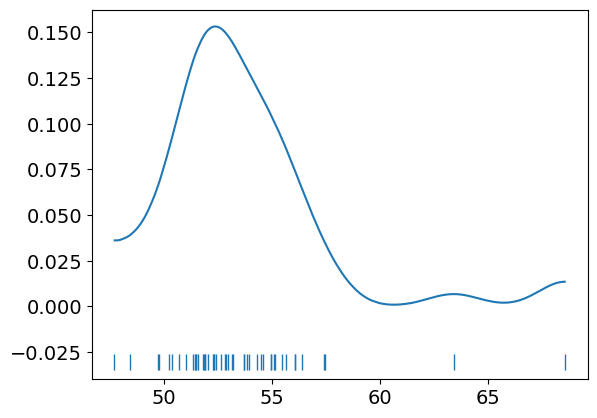

In [2]:
samples = np.loadtxt("./data/chemical_shifts.csv")
az.plot_kde(samples, rug=True)

上述数据分布近似高斯分布$\cal{N}(\mu, \sigma)$, 其中$\mu$和$\sigma$待估计.  
这里假设:

$\mu \sim \cal{U}(l_a, l_b)$  
$\sigma \sim |\cal{N}(\mu_\sigma, \sigma_\sigma)|$

下面开始构建PyMC贝叶斯估计模型.

In [4]:
with pm.Model() as model:
    mu = pm.Uniform("mu", lower=20, upper=70)
    sigma = pm.HalfNormal("sigma", sigma=5)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=samples)
    
    trace = pm.sample(1000, random_seed=42)
    az.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [mu, sigma]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


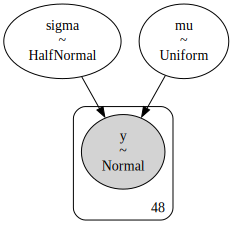

In [5]:
pm.model_graph.model_to_graphviz(model)

In [10]:
# # 总结后验
az.summary(trace, var_names=["mu"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.503,0.51,52.585,54.495,0.009,0.007,3039.0,2096.0,1.0
